In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import functions as fn
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df_PLTCM = pd.read_csv('data/pltcm_manipulated_59604_rev1.csv', header=None)
pd.read_csv('data/pltcm_manipulated_59604_rev1.csv', names=fn.columns_PLTCM, header=None)

,EVENT_ID,PROGRAM_ID,1,2,3,4,5,6,INPUT_WIDTH,INPUT_THICKNESS,...,TARGET_WIDTH,THICKNESS_HSM,THICKNESS,TRIM_WIDTH,WIDTH,MATERIAL_ID,PIECE_ID,WEIGHT,LENGTH,INPUT_LENGTH
0,1,3609,0,0,0,0,0,0,1264.0446,2.55459,...,1222.6404,2.55459,0.477354,1224.67,1222.6381,318580,17167961-03000,13.57540,2998.57,543.95600
1,2,3609,0,0,0,0,0,0,1129.5043,2.73491,...,1089.0250,2.73491,0.564271,1091.06,1089.0281,323346,17172941-01000,21.04121,4387.14,875.23380
2,3,3609,0,0,0,0,0,0,1096.1252,2.71956,...,1057.3627,2.71956,0.614289,1059.39,1057.3580,323357,17172961-04000,15.52353,3061.01,672.14825
3,4,3609,0,0,0,0,0,0,1129.7084,2.73506,...,1089.0250,2.73506,0.564197,1091.06,1089.0281,323344,17172921-05000,21.02293,4386.41,875.66516
4,5,3609,0,0,0,0,0,0,1569.3829,2.63399,...,1528.7625,2.63399,0.569115,1529.56,1528.7650,318740,17168341-04000,17.28409,2558.96,536.53850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59599,59600,22800,0,0,0,0,0,0,1261.3135,5.00986,...,1222.3738,5.00986,1.431855,1222.90,1222.3717,1117991,20165941-06000,17.57078,1271.65,371.10983
59600,59601,22800,0,0,0,0,0,0,1261.1356,4.65018,...,1222.3738,4.65018,1.146508,1222.90,1222.3717,1117999,20165961-07000,17.78187,1612.51,404.14432
59601,59602,22800,0,0,0,0,0,0,1263.5488,2.73054,...,1212.2137,2.73054,0.512399,1212.74,1212.2117,1118016,20166001-07000,17.53634,3656.06,685.52203
59602,59603,22800,0,0,0,0,0,0,1280.8510,2.52041,...,1242.1870,2.52041,0.470304,1245.74,1242.1840,1117987,20165941-02000,20.33075,4472.55,840.73800


In [9]:
#df = df_PLTCM
feature = 8 # input width
df = pd.DataFrame()
df['sequence_id'] = df_PLTCM[1]
df[feature] = df_PLTCM[feature]
df['bins_fxd_step'] = fn.binning_fxd_step(df_PLTCM[feature], 11)
df['bins_fxd_bucket'] = fn.binning_fxd_count(df_PLTCM[feature], 200)
df
#df.iloc[[73,472,1213,9087], [0,2]]

,sequence_id,8,bins_fxd_step,bins_fxd_bucket
0,3609,1264.0446,"(1258, 1269)","(1263, 1265)"
1,3609,1129.5043,"(1126, 1137)","(1127, 1131)"
2,3609,1096.1252,"(1093, 1104)","(1094, 1098)"
3,3609,1129.7084,"(1126, 1137)","(1127, 1131)"
4,3609,1569.3829,"(1566, 1577)","(1569, 1570)"
...,...,...,...,...
59599,22800,1261.3135,"(1258, 1269)","(1260, 1262)"
59600,22800,1261.1356,"(1258, 1269)","(1260, 1262)"
59601,22800,1263.5488,"(1258, 1269)","(1263, 1264)"
59602,22800,1280.8510,"(1280, 1291)","(1280, 1282)"


In [5]:
# Calculate lift and get indices
lift_pairwise, elem_map = fn.calculate_lift_pairwise(df, min_lift=1, return_element_mapping=True)

# Build adjacency matrix
adj_matrix = fn.create_adjacency_matrix(lift_pairwise, elem_map)

In [ ]:
lift_pairwise
#lift_pairwise.index.to_list()

,element_A,element_B,element_A_row_idx,element_B_row_idx,co_occur_count,lift_value,interpretation
262,"(1016, 1027)","(1027, 1038)",15184,15259,4,1528.307700,Positive
3338,"(1874, 1885)","(1005, 1016)",1213,9087,2,1490.100000,Positive
121,"(983, 994)","(1016, 1027)",6,15184,4,1103.777800,Positive
3245,"(1830, 1841)","(1819, 1830)",2402,15566,27,1075.740650,Positive
2942,"(1687, 1698)","(1005, 1016)",699,9087,13,998.520600,Positive
...,...,...,...,...,...,...,...
1403,"(1280, 1291)","(1445, 1456)",73,472,878,1.009628,Negative
2702,"(1588, 1599)","(1544, 1555)",398,838,539,1.009008,Negative
375,"(1071, 1082)","(1456, 1467)",172,1030,112,1.008420,Negative
763,"(1137, 1148)","(1335, 1346)",570,580,263,1.007135,Negative


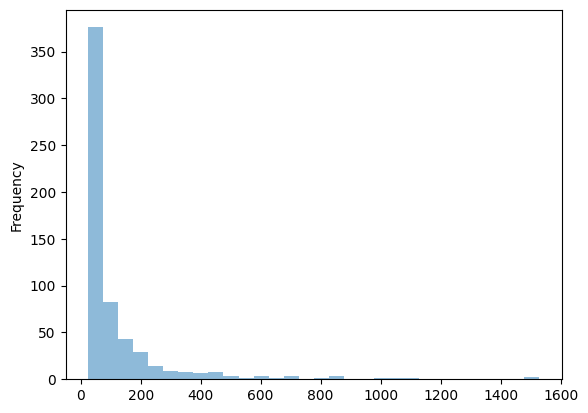

In [11]:
#histogram
# presence of various lift values shows that a clear decision criteria is hard to define 
ax = lift_pairwise['lift_value'].apply(lambda x: x if 25 < x < 5000 else None).plot.hist(bins=30, alpha=0.5)

In [ ]:
adj_matrix
# select specific pair
# lift_pairwise.loc[(lift_pairwise['element_A_row_idx'] == 0) & (lift_pairwise['element_B_row_idx'] == 5)]

,0,1,2,4,5,6,7,8,13,14,...,6585,8553,8636,9087,11931,13191,15184,15259,15566,30000
0,1.000000,0.000000,0.000000,0.000000,7.243478,2.711224,1.171064,0.000000,0.000000,0.000000,...,0.000000,1.542305,16.6093,20.346350,1.647842,0.000000,94.672750,3.832921,21.49430,4.235340
1,0.000000,1.000000,0.000000,0.000000,20.594450,4.243680,5.797854,0.000000,0.000000,1.128944,...,1.697376,3.086633,0.0000,5.616700,8.786167,0.000000,89.866567,7.632900,2.64310,1.872200
2,0.000000,0.000000,1.000000,0.000000,7.078833,4.375113,7.124540,0.000000,0.000000,1.428879,...,3.272315,3.749880,9.4385,0.000000,6.354250,0.000000,84.946300,15.609800,3.33120,4.719200
4,0.000000,0.000000,0.000000,1.000000,7.214325,2.349281,1.608057,0.000000,0.000000,0.000000,...,0.000000,1.780874,23.0858,22.071043,1.132625,0.000000,26.637450,10.764273,8.02258,5.993437
5,7.243478,20.594450,7.078833,7.214325,1.000000,275.944425,170.239900,18.373600,6.838178,31.086925,...,70.620850,83.902000,0.0000,620.875000,107.553175,65.141000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,0.000000,0.000000,0.000000,0.000000,65.141000,5.428400,7.880000,2.630550,0.000000,1.630800,...,7.100700,19.806400,65.1410,195.423000,11.540700,1.000000,0.000000,176.632250,34.48640,56.998375
15184,94.672750,89.866567,84.946300,26.637450,0.000000,1103.777800,0.000000,48.996300,14.855400,276.328200,...,188.322300,0.000000,0.0000,0.000000,0.000000,0.000000,1.000000,1528.307700,0.00000,0.000000
15259,3.832921,7.632900,15.609800,10.764273,0.000000,127.359000,0.000000,11.306833,2.816008,15.486514,...,43.459000,77.448000,0.0000,859.673100,54.152600,176.632250,1528.307700,1.000000,0.00000,668.634600
15566,21.494300,2.643100,3.331200,8.022580,0.000000,0.000000,0.000000,17.292800,9.587300,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,34.486400,0.000000,0.000000,1.00000,0.000000
